In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot parameters
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['ytick.major.size'] = 0
# Avoid inaccurate floating values (for inverse matrices in dot product for instance)
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


In [3]:
%%html
<style>
.pquote {
  text-align: left;
  margin: 40px 0 40px auto;
  width: 70%;
  font-size: 1.5em;
  font-style: italic;
  display: block;
  line-height: 1.3em;
  color: #5a75a7;
  font-weight: 600;
  border-left: 5px solid rgba(90, 117, 167, .1);
  padding-left: 6px;
}
.notes {
  font-style: italic;
  display: block;
  margin: 40px 10%;
}
img + em {
  text-align: center;
  display: block;
  color: gray;
  font-size: 0.9em;
  font-weight: 600;
}
</style>

$$
\newcommand\bs[1]{\boldsymbol{#1}}
\newcommand\norm[1]{\left\lVert#1\right\rVert}
$$

<span class='notes'>
    This content is part of a series following the chapter 2 on linear algebra from the [Deep Learning Book](http://www.deeplearningbook.org/) by Goodfellow, I., Bengio, Y., and Courville, A. (2016). It aims to provide intuitions/drawings/python code on mathematical theories and is constructed as my understanding of these concepts. You can check the syllabus in the [introduction post](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-Introduction/).
</span>

# Introduction

The [2.4](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.4-Linear-Dependence-and-Span/) was heavy but this one is light. We will however see an important concept for machine learning and deep learning. The norm is what is generally used to evaluate the error of a model. For instance it is used to calculate the error between the output of a neural network and what is expected (the actual label or value). You can think of the norm as the length of a vector. It is a function that maps a vector to a positive value. Different functions can be used and we will see few examples.


# 2.5 Norms

Norms are any functions that are characterized by the following properties:

1- Norms are non-negative values. If you think of the norms as a length, you easily see why it can't be negative.

2- Norms are $0$ if and only if the vector is a zero vector

3- Norms respect the triangle inequality. See bellow.

4- $\norm{\bs{k}\cdot \bs{u}}=| \bs{k}| \cdot \norm{\bs{u}}$. The norm of a vector multiplied by a scalar is equal to the absolute value of this scalar multiplied by the norm of the vector.

It is usually written with two horizontal bars: $\norm{\bs{x}}$

# The triangle inequality

The norm of the sum of some vectors is less than or equal to the sum of the norms of these vectors.

$$
\norm{\bs{u}+\bs{v}} \leq \norm{\bs{u}}+\norm{\bs{v}}
$$

### Example 1.

$$
\bs{u}=
\begin{bmatrix}
    1 & 6
\end{bmatrix}
$$

and

$$
\bs{v}=
\begin{bmatrix}
    4 & 2
\end{bmatrix}
$$

$$
\norm{\bs{u}+\bs{v}} = \sqrt{(1+4)^2+(6+2)^2} = \sqrt{89} \approx 9.43
$$

$$
\norm{\bs{u}}+\norm{\bs{v}} = \sqrt{1^2+6^2}+\sqrt{4^2+2^2} = \sqrt{37}+\sqrt{20} \approx 10.55
$$

Let's check these results:

In [4]:
u = np.array([1, 6])
u

array([1, 6])

In [5]:
v = np.array([4, 2])
v

array([4, 2])

In [6]:
u+v

array([5, 8])

In [7]:
np.linalg.norm(u+v)

9.433981132056603

In [8]:
np.linalg.norm(u)+np.linalg.norm(v)

10.554898485297798

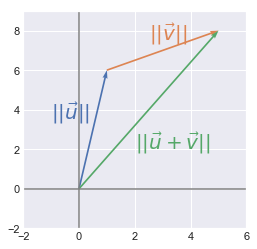

In [9]:
u = [0,0,1,6]
v = [0,0,4,2]
u_bis = [1,6,v[2],v[3]]
w = [0,0,5,8]
plt.quiver([u[0], u_bis[0], w[0]],
           [u[1], u_bis[1], w[1]],
           [u[2], u_bis[2], w[2]],
           [u[3], u_bis[3], w[3]],
           angles='xy', scale_units='xy', scale=1, color=sns.color_palette())
# plt.rc('text', usetex=True)
plt.xlim(-2, 6)
plt.ylim(-2, 9)
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

plt.text(-1, 3.5, r'$||\vec{u}||$', color=sns.color_palette()[0], size=20)
plt.text(2.5, 7.5, r'$||\vec{v}||$', color=sns.color_palette()[1], size=20)
plt.text(2, 2, r'$||\vec{u}+\vec{v}||$', color=sns.color_palette()[2], size=20)

plt.show()
plt.close()


<span class='pquote'>
    Geometrically, this simply means that the shortest path between two points is a line
</span>

# P-norms: general rules

Here is the recipe to get the $p$-norm of a vector:

1. Calculate the absolute value of each element
2. Take the power $p$ of these absolute values
3. Sum all these powered absolute values
4. Take the power $\frac{1}{p}$ of this result

This is more condensly expressed with the formula:

$$
\norm{\bs{x}}_p=(\sum_i|\bs{x}_i|^p)^{1/p}
$$

This will be clear with examples using these widely used $p$-norms.

# The $L^0$ norm

All positive values will get you a $1$ if you calculate its power $0$ except $0$ that will get you another $0$. Therefore this norm corresponds to the number of non-zero elements in the vector. It is not really a norm because if you multiply the vector by $\alpha$, this number is the same (rule 4 above).

# The $L^1$ norm

$p=1$ so this norm is simply the sum of the absolute values:

$$
\norm{\bs{x}}_1=\sum_{i} |\bs{x}_i|
$$

# The Euclidean norm ($L^2$ norm)

The Euclidean norm is the $p$-norm with $p=2$. This may be the more used norm with the squared $L^2$ norm.

$$
\norm{\bs{x}}_2=(\sum_i \bs{x}_i^2)^{1/2}\Leftrightarrow \sqrt{\sum_i \bs{x}_i^2}
$$

Let's see an example of this norm:

### Example 2.

Graphically, the Euclidean norm corresponds to the length of the vector from the origin to the point obtained by linear combination (like applying Pythagorean theorem).

$$
\bs{u}=
\begin{bmatrix}
    3 \\\\
    4
\end{bmatrix}
$$

$$
\begin{align*}
\norm{\bs{u}}_2 &=\sqrt{|3|^2+|4|^2}\\\\
&=\sqrt{25}\\\\
&=5
\end{align*}
$$


So the $L^2$ norm is $5$.

The $L^2$ norm can be calculated with the `linalg.norm` function from numpy. We can check the result:

In [10]:
np.linalg.norm([3, 4])

5.0

Here is the graphical representation of the vectors:

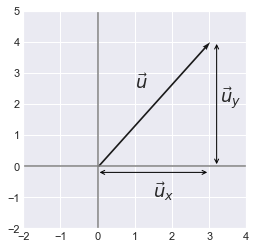

In [11]:
u = [0,0,3,4]

plt.quiver([u[0]],
           [u[1]],
           [u[2]],
           [u[3]],
           angles='xy', scale_units='xy', scale=1)

plt.xlim(-2, 4)
plt.ylim(-2, 5)
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

plt.annotate('', xy = (3.2, 0), xytext = (3.2, 4),
             arrowprops=dict(edgecolor='black', arrowstyle = '<->'))
plt.annotate('', xy = (0, -0.2), xytext = (3, -0.2),
             arrowprops=dict(edgecolor='black', arrowstyle = '<->'))

plt.text(1, 2.5, r'$\vec{u}$', size=18)
plt.text(3.3, 2, r'$\vec{u}_y$', size=18)
plt.text(1.5, -1, r'$\vec{u}_x$', size=18)

plt.show()
plt.close()

In this case, the vector is in a 2-dimensional space but this stands also for more dimensions.

$$
u=
\begin{bmatrix}
    u_1\\\\
    u_2\\\\
    \cdots \\\\
    u_n
\end{bmatrix}
$$

$$
||u||_2 = \sqrt{u_1^2+u_2^2+\cdots+u_n^2}
$$


# The squared Euclidean norm (squared $L^2$ norm)

$$
\sum_i|\bs{x}_i|^2
$$


The squared $L^2$ norm is convenient because it removes the square root and we end up with the simple sum of every squared values of the vector. 

The squared Euclidean norm is widely used in machine learning partly because it can be calculated with the vector operation $\bs{x}^\text{T}\bs{x}$. There can be performance gain due to the optimization See [here](https://softwareengineering.stackexchange.com/questions/312445/why-does-expressing-calculations-as-matrix-multiplications-make-them-faster) and [here](https://www.quora.com/What-makes-vector-operations-faster-than-for-loops) for more details.

### Example 3.

$$
\bs{x}=
\begin{bmatrix}
    2 \\\\
    5 \\\\
    3 \\\\
    3
\end{bmatrix}
$$

$$
\bs{x}^\text{T}=
\begin{bmatrix}
    2 & 5 & 3 & 3
\end{bmatrix}
$$

$$
\begin{align*}
\bs{x}^\text{T}\bs{x}&=
\begin{bmatrix}
    2 & 5 & 3 & 3
\end{bmatrix} \times
\begin{bmatrix}
    2 \\\\
    5 \\\\
    3 \\\\
    3
\end{bmatrix}\\\\
&= 2\times 2 + 5\times 5 + 3\times 3 + 3\times 3= 47
\end{align*}
$$

In [12]:
x = np.array([[2], [5], [3], [3]])
x

array([[2],
       [5],
       [3],
       [3]])

In [13]:
euclideanNorm = x.T.dot(x)
euclideanNorm

array([[47]])

In [14]:
np.linalg.norm(x)**2

47.0

It works!

## Derivative of the squared $L^2$ norm

Another advantage of the squared $L^2$ norm is that its partial derivative is easily computed:

$$
u=
\begin{bmatrix}
    u_1\\\\
    u_2\\\\
    \cdots \\\\
    u_n
\end{bmatrix}
$$

$$
\norm{u}_2 = u_1^2+u_2^2+\cdots+u_n^2
$$

$$
\begin{cases}
\dfrac{d\norm{u}_2}{du_1} = 2u_1\\\\
\dfrac{d\norm{u}_2}{du_2} = 2u_2\\\\
\cdots\\\\
\dfrac{d\norm{u}_2}{du_n} = 2u_n
\end{cases}
$$

## Derivative of the $L^2$ norm

In the case of the $L^2$ norm, the derivative is more complicated and takes every elements of the vector into account:

$$
\norm{u}_2 = \sqrt{(u_1^2+u_2^2+\cdots+u_n^2)} = (u_1^2+u_2^2+\cdots+u_n^2)^{\frac{1}{2}}
$$

$$
\begin{align*}
\dfrac{d\norm{u}_2}{du_1} &=
\dfrac{1}{2}(u_1^2+u_2^2+\cdots+u_n^2)^{\frac{1}{2}-1}\cdot
\dfrac{d}{du_1}(u_1^2+u_2^2+\cdots+u_n^2)\\\\
&=\dfrac{1}{2}(u_1^2+u_2^2+\cdots+u_n^2)^{-\frac{1}{2}}\cdot
\dfrac{d}{du_1}(u_1^2+u_2^2+\cdots+u_n^2)\\\\
&=\dfrac{1}{2}\cdot\dfrac{1}{(u_1^2+u_2^2+\cdots+u_n^2)^{\frac{1}{2}}}\cdot
\dfrac{d}{du_1}(u_1^2+u_2^2+\cdots+u_n^2)\\\\
&=\dfrac{1}{2}\cdot\dfrac{1}{(u_1^2+u_2^2+\cdots+u_n^2)^{\frac{1}{2}}}\cdot
2\cdot u_1\\\\
&=\dfrac{u_1}{\sqrt{(u_1^2+u_2^2+\cdots+u_n^2)}}\\\\
\end{align*}
$$

$$
\begin{cases}
\dfrac{d\norm{u}_2}{du_1} = \dfrac{u_1}{\sqrt{(u_1^2+u_2^2+\cdots+u_n^2)}}\\\\
\dfrac{d\norm{u}_2}{du_2} = \dfrac{u_2}{\sqrt{(u_1^2+u_2^2+\cdots+u_n^2)}}\\\\
\cdots\\\\
\dfrac{d\norm{u}_2}{du_n} = \dfrac{u_n}{\sqrt{(u_1^2+u_2^2+\cdots+u_n^2)}}\\\\
\end{cases}
$$

One problem of the squared $L^2$ norm is that it hardly discriminates between 0 and small values because the increase of the function is slow.

We can see this by graphically comparing the squared $L^2$ norm with the $L^2$ norm. The $z$-axis corresponds to the norm and the $x$- and $y$-axis correspond to two parameters. The same thing is true with more than 2 dimensions but it would be hard to visualize it.

$L^2$ norm:

<img src="images/l2-norm.png" width="500" alt="Representation of the L2 norm" title="The L2 norm">
<em>The L2 norm</em>

Squared $L^2$ norm:

<img src="images/squared-l2-norm.png" width="500" alt="Representation of the squared L2 norm" title="The squared L2 norm">
<em>The squared L2 norm</em>

$L^1$ norm:

<img src="images/L1-norm.png" alt="Representation of the L1 norm" title="The L1 norm" width="500">
<em>The L1 norm</em>

These plots are done with the help of this [website](https://academo.org/demos/3d-surface-plotter/). Go and plot these norms if you need to move them in order to catch their shape.

# The max norm

It is the $L^\infty$ norm and corresponds to the absolute value of the greatest element of the vector.

$$
\norm{\bs{x}}_\infty = \max\limits_i|x_i|
$$

# Matrix norms: the Frobenius norm

$$
\norm{\bs{A}}_F=\sqrt{\sum_{i,j}A^2_{i,j}}
$$

This is equivalent to take the $L^2$ norm of the matrix after flattening.

The same Numpy function can be use:

In [15]:
A = np.array([[1, 2], [6, 4], [3, 2]])
A

array([[1, 2],
       [6, 4],
       [3, 2]])

In [16]:
np.linalg.norm(A)

8.366600265340756

# Expression of the dot product with norms

$$
\bs{x}^\text{T}\bs{y} = \norm{\bs{x}}_2\cdot\norm{\bs{y}}_2\cos\theta
$$


### Example 4.

$$
\bs{x}=
\begin{bmatrix}
    0 \\\\
    2
\end{bmatrix}
$$

and 

$$
\bs{y}=
\begin{bmatrix}
    2 \\\\
    2
\end{bmatrix}
$$

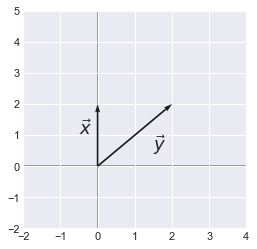

In [17]:
x = [0,0,0,2]
y = [0,0,2,2]

plt.xlim(-2, 4)
plt.ylim(-2, 5)
plt.axvline(x=0, color='grey', zorder=0)
plt.axhline(y=0, color='grey', zorder=0)

plt.quiver([x[0], y[0]],
           [x[1], y[1]],
           [x[2], y[2]],
           [x[3], y[3]],
           angles='xy', scale_units='xy', scale=1)

plt.text(-0.5, 1, r'$\vec{x}$', size=18)
plt.text(1.5, 0.5, r'$\vec{y}$', size=18)

plt.show()
plt.close()

We took this example for its simplicity. As we can see, the angle $\theta$ is equal to 45°.

$$
\bs{x^\text{T}y}=
\begin{bmatrix}
    0 & 2
\end{bmatrix} \cdot
\begin{bmatrix}
    2 \\\\
    2
\end{bmatrix} =
0\times2+2\times2 = 4
$$

and

$$
\norm{\bs{x}}_2=\sqrt{0^2+2^2}=\sqrt{4}=2
$$

$$
\norm{\bs{y}}_2=\sqrt{2^2+2^2}=\sqrt{8}
$$

$$
2\times\sqrt{8}\times cos(45)=4
$$

Here are the operations using numpy:

In [18]:
# Note: np.cos take the angle in radian
np.cos(np.deg2rad(45))*2*np.sqrt(8)

4.000000000000001

<span class='notes'>
    Feel free to drop me an email or a comment. The syllabus of this series can be found [in the introduction post](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-Introduction/). All the notebooks can be found on [Github](https://github.com/hadrienj/deepLearningBook-Notes).
</span>

# References

- https://en.wikipedia.org/wiki/Norm_(mathematics)

- [3D plots](https://academo.org/demos/3d-surface-plotter/)